In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import matplotlib.image as mpimg
#from google.colab.patches import cv2_imshow

1. Crop and flip an image using Numpy array indexing.
2. Implement image translation using Numpy and OpenCV.
3. Implement image rotation using Numpy and OpenCV.
4. Implement image resizing using OpenCV.
5. Implement bitwise operations: AND, OR, XOR.
6. Implement the "mask" operation, where a third image 'h' contains only a Region of Interest (ROI -- defined by the second image mask 'g') obtained from the input image 'f'. Note that this Region can be of any shape.

In [2]:
def plot2Images(img, dst, titleImg = "Original", titleDst = "Resultado"):
    plt.subplots(figsize=(24, 14))
    plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title(titleImg)
    #plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB)),plt.title(titleDst)
    #plt.xticks([]), plt.yticks([])
    plt.show()

def plotImage(img, title=""):
    plt.subplots(figsize=(20, 11))
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()

1. Crop and flip an image using Numpy array indexing.

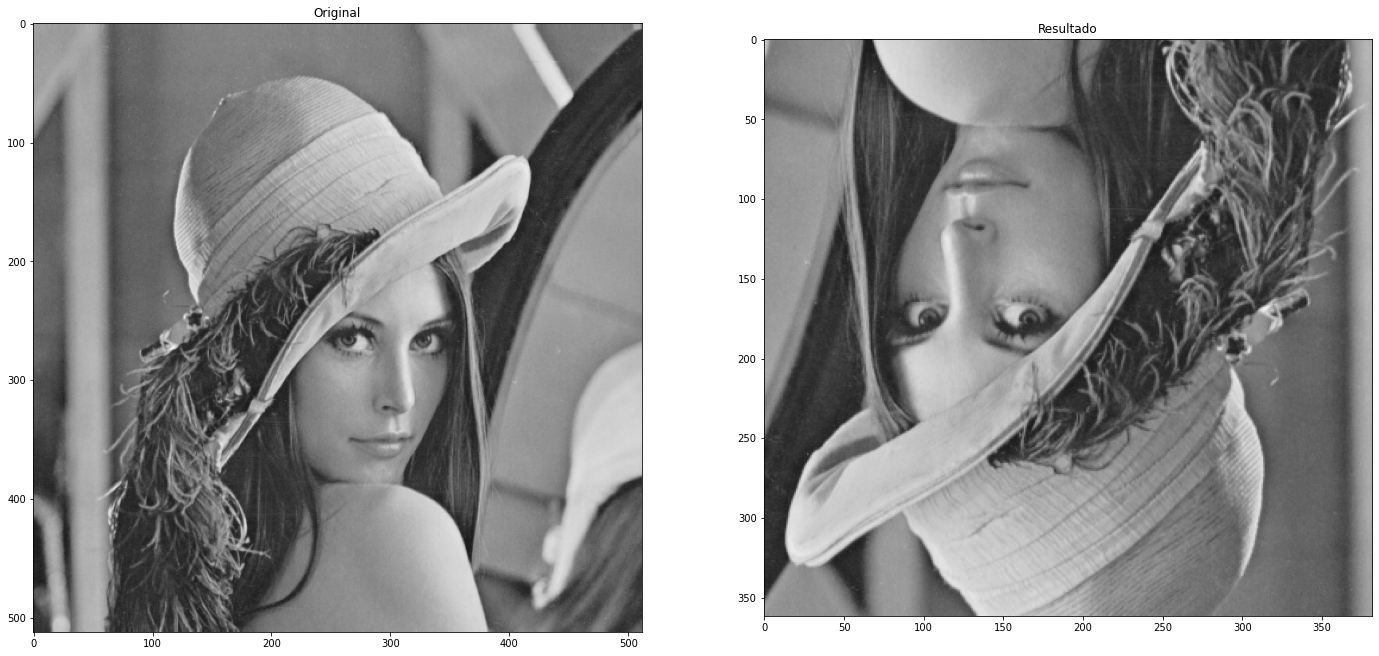

In [4]:
img = cv.imread('../imagens/lena.png')

# Flip
#dst = np.flip(img)
dst = img[::-1, ::-1]

# Crop
imgR, imgC, _ = img.shape
cropL = 80
cropR = 50
cropU = 70
cropB = 80
dst = dst[cropU:imgR-cropB, cropL:imgC-cropR]
#norm = np.zeros(dst.shape)
#dst = cv.normalize(dst, norm, 0, 255, cv.NORM_MINMAX)
plot2Images(img, dst.astype('uint8'))

2. Implement image translation using Numpy and OpenCV.

(600, 800, 3)


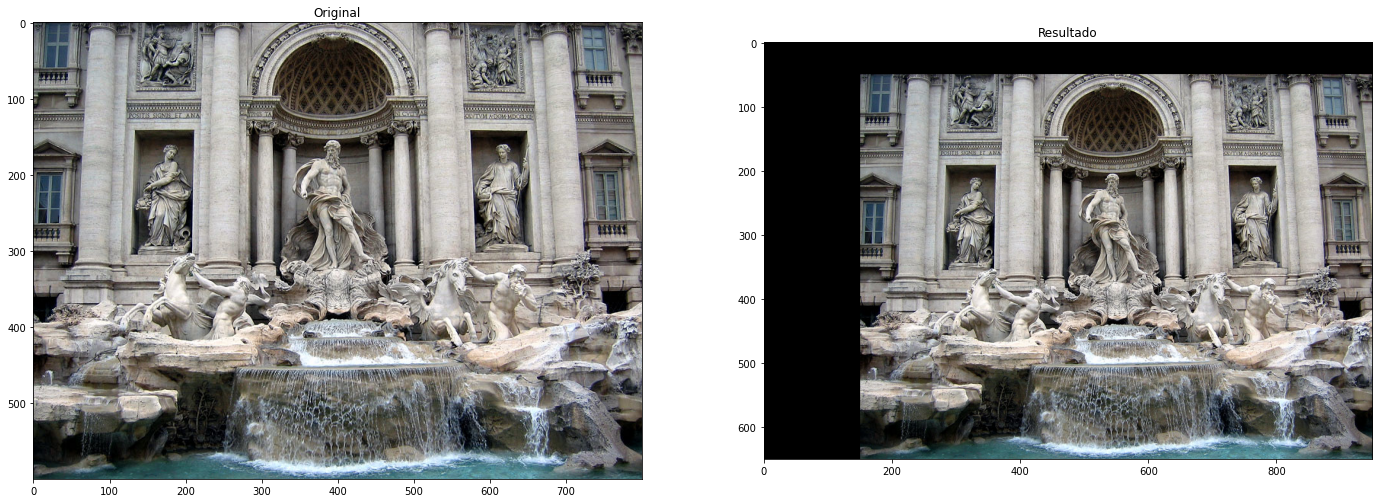

In [5]:
img = cv.imread('../imagens/Fountain2.jpg')
print(img.shape)
height, width, _ = img.shape
tx = 150
ty = 50
T = np.array([[1, 0, float(tx)], 
              [0, 1, float(ty)]])

dst = cv.warpAffine(img, T, (width+tx, height+ty))
plot2Images(img, dst)

3. Implement image rotation using Numpy and OpenCV.

[[ 7.07106781e-01  7.07106781e-01 -2.69728281e+02]
 [-7.07106781e-01  7.07106781e-01  1.05281833e+03]]


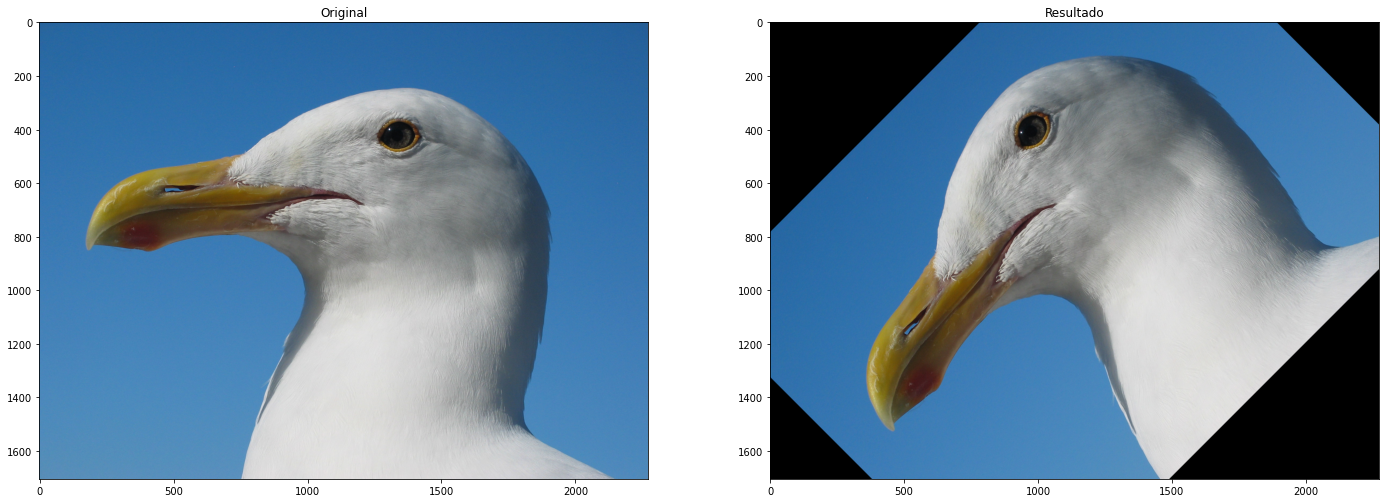

In [6]:
img = cv.imread('../imagens/gaivota.jpg')
height, width, _ = img.shape

theta = 45
midPoint = (width/2, height/2)
R = cv.getRotationMatrix2D(midPoint, angle=theta, scale=1)
rotated = cv.warpAffine(img, R, (width, height))

print(R)
plot2Images(img, rotated)

4. Implement image resizing using OpenCV.

Original:  (654, 500, 3)
Resized:  (218, 167, 3)


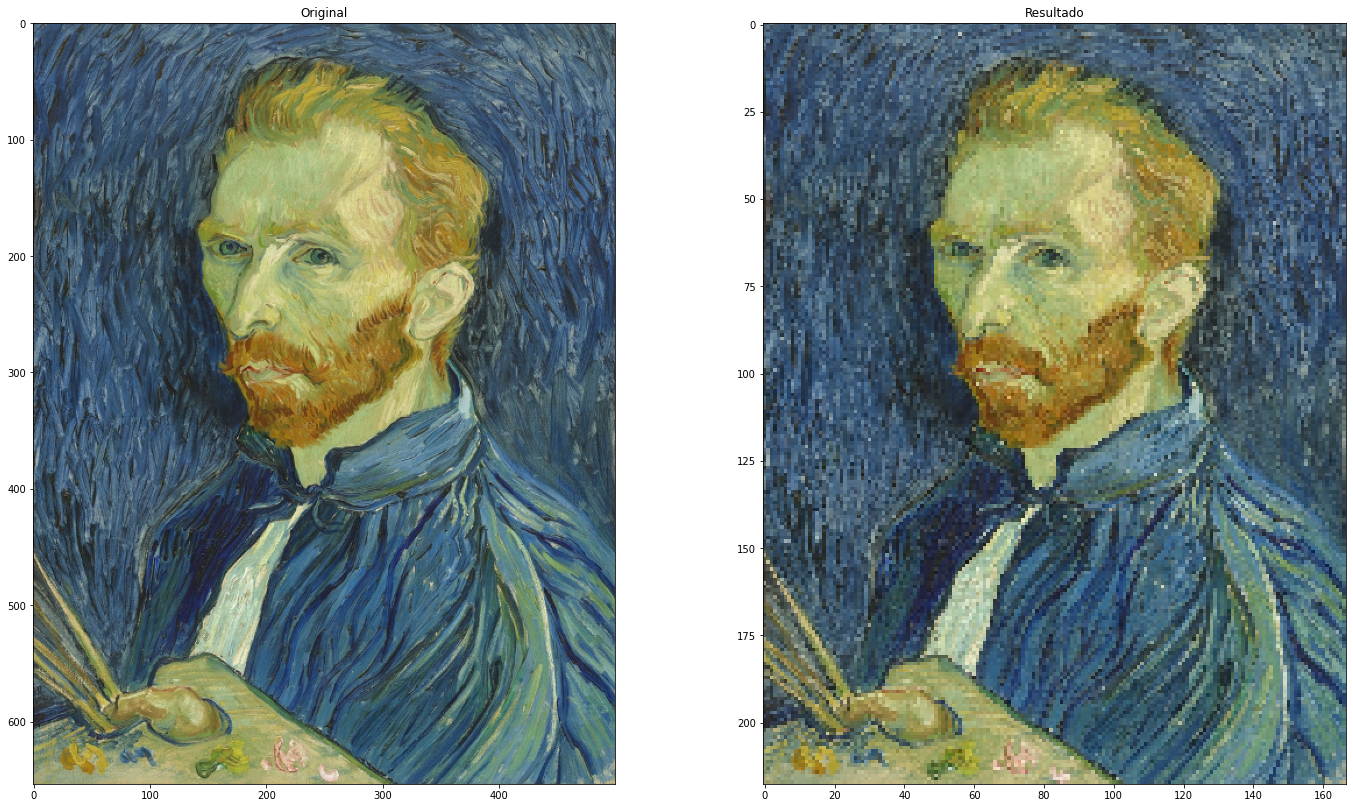

In [7]:
img = cv.imread('../imagens/van-gogh.jpg')
resized = cv.resize(img, dsize=(0, 0), fx = 1/3, fy = 1/3, interpolation=cv.INTER_NEAREST)

#cv2_imshow(img)
#cv2_imshow(resized)
print("Original: ", img.shape)
print("Resized: ", resized.shape)
plot2Images(img, resized)

5. Implement bitwise operations: AND, OR, XOR.

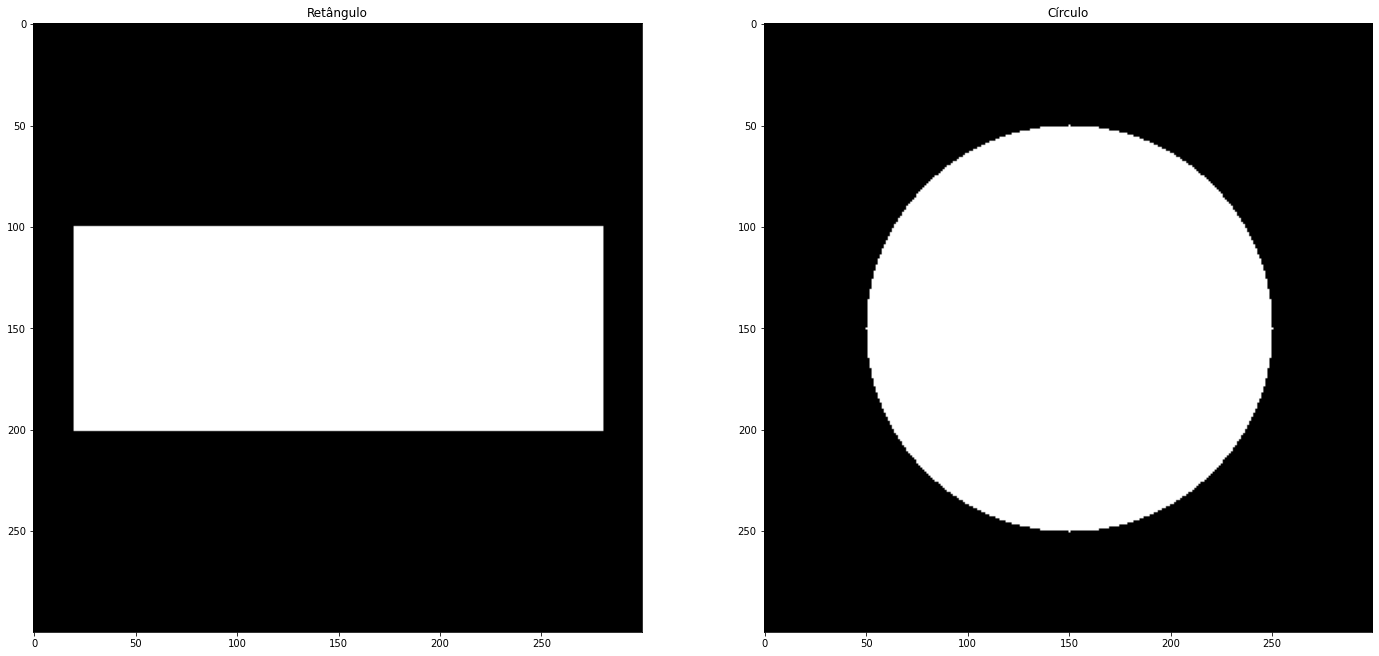

In [7]:
# Criando iamgens

rectangle = np.zeros((300, 300), dtype="uint8")
# preenche o um retângulo com 255 com os intervalos horizontalmente (20 até 280) e verticalmente (100 até 200)
cv.rectangle(rectangle, (20, 100), (280, 200), 255, -1)

circle = np.zeros((300, 300), dtype = "uint8")
# preenche um círculo com centro (150, 150) e raio 100, com o valor de 255
cv.circle(circle, (150, 150), 100, 255, -1)

plot2Images(rectangle, circle, "Retângulo", "Círculo")

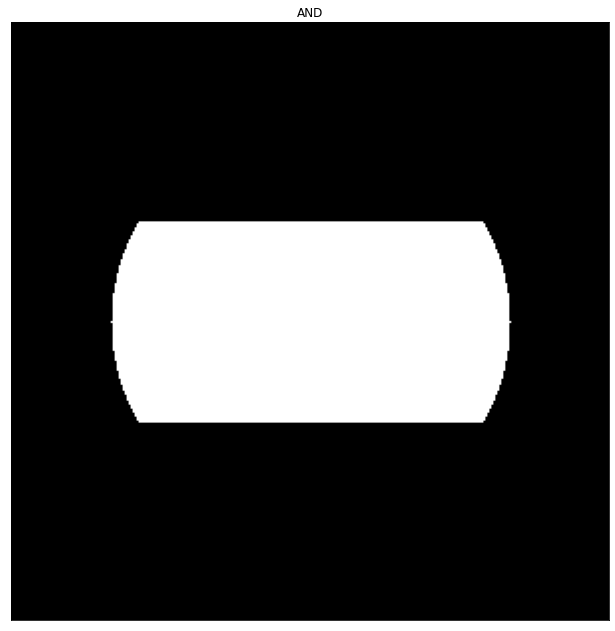

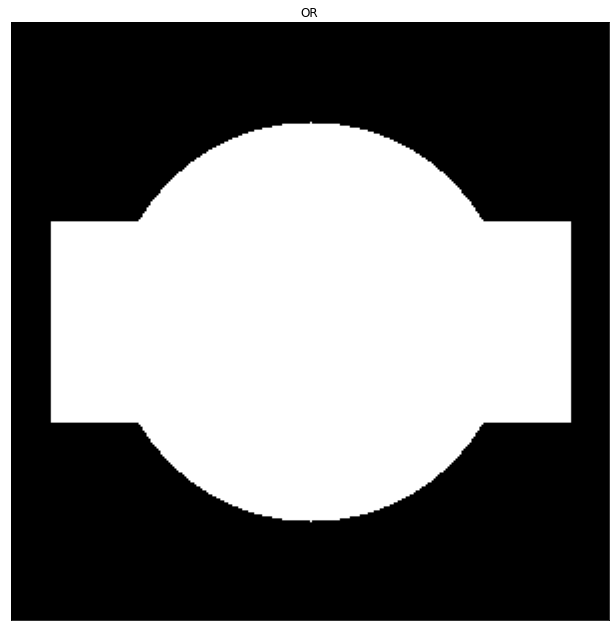

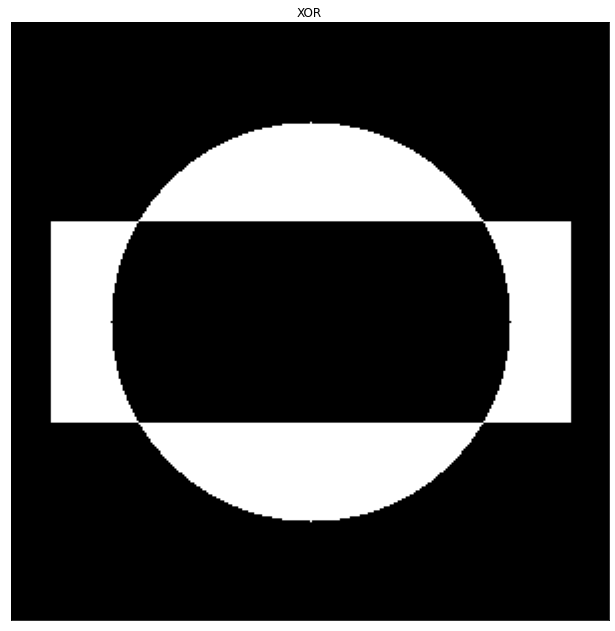

In [8]:
# AND
resultAnd = cv.bitwise_and(rectangle, circle)

plotImage(resultAnd, "AND")

# OR
resultOr = cv.bitwise_or(rectangle, circle)

plotImage(resultOr, "OR")

#XOR
resultXor = cv.bitwise_xor(rectangle, circle)

plotImage(resultXor, "XOR")

6. Implement the "mask" operation, where a third image 'h' contains only a Region of Interest (ROI -- defined by the second image mask 'g') obtained from the input image 'f'. Note that this Region can be of any shape.

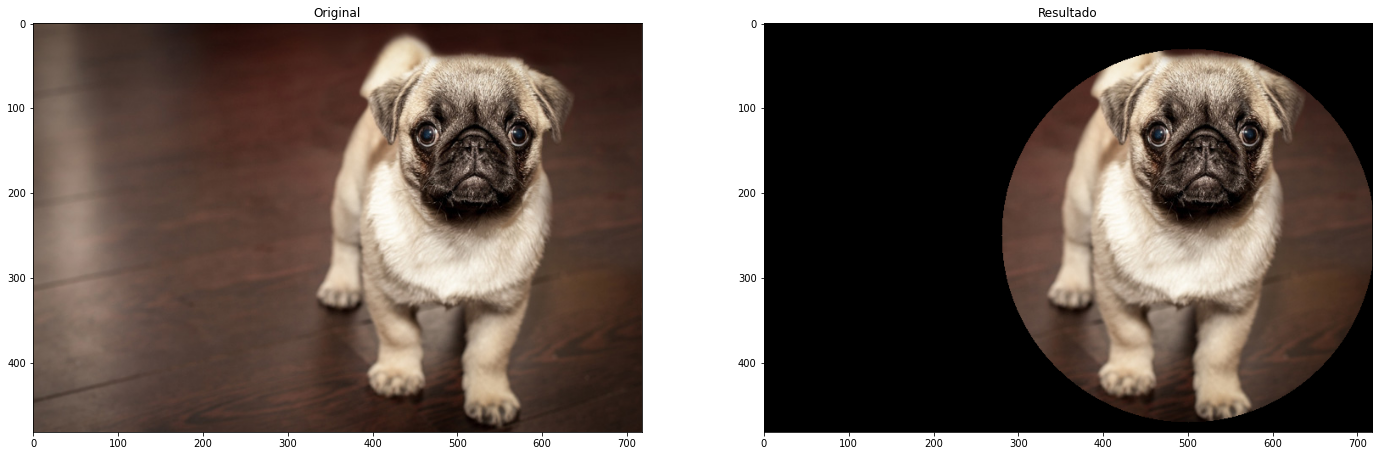

In [9]:
imgF = cv.imread('cachorro.jpg')

maskG = np.zeros(imgF.shape[:2], dtype="uint8")

cv.circle(maskG, (500, 250), 220, 255, -1)

imgH = cv.bitwise_and(imgF, imgF, mask=maskG)

plot2Images(imgF, imgH)